In [336]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [337]:
participant_status = pd.read_csv("NecessaryCSVFiles/Participant_Status_03Apr2024.csv")

In [338]:
participant_status

,PATNO,COHORT,COHORT_DEFINITION,ENROLL_DATE,ENROLL_STATUS,STATUS_DATE,ENROLL_AGE,INEXPAGE,AV133STDY,TAUSTDY,...,COMMENTS,CONDATE,ENRLPINK1,ENRLPRKN,ENRLSRDC,ENRLHPSM,ENRLRBD,ENRLLRRK2,ENRLSNCA,ENRLGBA
0,3000,2,Healthy Control,02/2011,Enrolled,05/2021,69.1,INEXHC,0.0,0.0,...,NaN,10/2023,0.0,0.0,0.0,0,0,0,0,0
1,3001,1,Parkinson's Disease,03/2011,Enrolled,09/2021,65.1,INEXPD,0.0,0.0,...,NaN,10/2023,0.0,0.0,1.0,0,0,0,0,0
2,3002,1,Parkinson's Disease,03/2011,Enrolled,09/2021,67.6,INEXPD,0.0,0.0,...,NaN,10/2023,0.0,0.0,1.0,0,0,0,0,0
3,3003,1,Parkinson's Disease,04/2011,Enrolled,01/2022,56.7,INEXPD,0.0,0.0,...,NaN,10/2023,0.0,0.0,1.0,0,0,0,0,0
4,3004,2,Healthy Control,04/2011,Enrolled,01/2022,59.4,INEXHC,0.0,0.0,...,NaN,10/2023,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,325051,1,Parkinson's Disease,NaN,Screened,03/2024,NaN,INEXPD,0.0,0.0,...,NaN,NaN,0.0,0.0,1.0,0,0,0,0,0
4175,325566,1,Parkinson's Disease,NaN,Pending,03/2024,NaN,INEXPD,0.0,0.0,...,NaN,NaN,0.0,0.0,1.0,0,0,0,0,0
4176,325718,1,Parkinson's Disease,NaN,Pending,03/2024,NaN,INEXPD,0.0,0.0,...,NaN,NaN,0.0,0.0,1.0,0,0,0,0,0
4177,325723,2,Healthy Control,NaN,Screened,03/2024,NaN,INEXHC,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0,0,0,0,0


In [339]:
participant_status.dtypes

PATNO                     int64
COHORT                    int64
COHORT_DEFINITION        object
ENROLL_DATE              object
ENROLL_STATUS            object
STATUS_DATE              object
ENROLL_AGE              float64
INEXPAGE                 object
AV133STDY               float64
TAUSTDY                 float64
GAITSTDY                float64
PISTDY                  float64
SV2ASTDY                float64
PPMI_ONLINE_ENROLL       object
CONCOHORT               float64
CONCOHORT_DEFINITION     object
CONLRRK2                float64
CONGBA                  float64
CONSNCA                 float64
CONPRKN                 float64
CONPINK1                float64
CONHPSM                 float64
CONRBD                  float64
PHENOCNV                float64
DIAG1                    object
DIAG1VIS                 object
DIAG2                    object
DIAG2VIS                 object
DIAG3                   float64
DIAG3VIS                float64
COMMENTS                 object
CONDATE 

In [340]:
participant_status["CONCOHORT_DEFINITION"]

0           Healthy Control
1       Parkinson's Disease
2       Parkinson's Disease
3       Parkinson's Disease
4           Healthy Control
               ...         
4174                    NaN
4175                    NaN
4176                    NaN
4177                    NaN
4178                    NaN
Name: CONCOHORT_DEFINITION, Length: 4179, dtype: object

In [341]:
participant_status_values = participant_status['CONCOHORT_DEFINITION'].value_counts()

participant_status_values

CONCOHORT_DEFINITION
Prodromal                                                      1233
Parkinson's Disease                                            1227
Healthy Control                                                 249
non-PD, non-Prodromal, non-HC (participants to be excluded)      10
SWEDD                                                             3
Name: count, dtype: int64

In [342]:
participant_status = participant_status.dropna(subset='CONCOHORT_DEFINITION', how='any')

In [343]:
participant_status['CONCOHORT_DEFINITION'].value_counts()

CONCOHORT_DEFINITION
Prodromal                                                      1233
Parkinson's Disease                                            1227
Healthy Control                                                 249
non-PD, non-Prodromal, non-HC (participants to be excluded)      10
SWEDD                                                             3
Name: count, dtype: int64

In [344]:
participant_status_patno_concohort = participant_status[['PATNO', 'CONCOHORT']].copy()

In [345]:
participant_status_patno_concohort

,PATNO,CONCOHORT
0,3000,2.0
1,3001,1.0
2,3002,1.0
3,3003,1.0
4,3004,2.0
...,...,...
3818,253290,1.0
3821,253387,4.0
3890,292774,4.0
3925,292880,1.0


In [346]:
participant_status_patno_concohort['CONCOHORT'].value_counts()

CONCOHORT
4.0    1233
1.0    1227
2.0     249
0.0      10
3.0       3
Name: count, dtype: int64

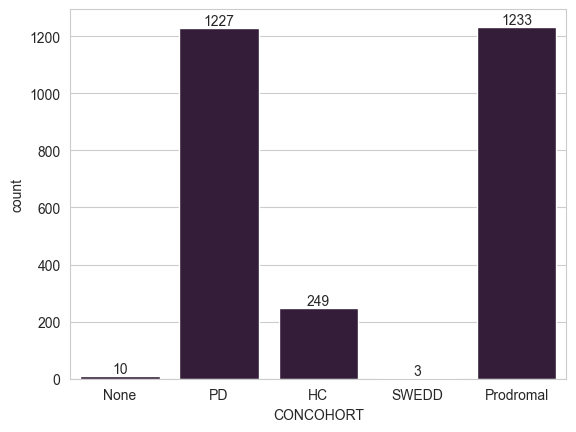

In [347]:
ax = sns.countplot(x='CONCOHORT', data=participant_status_patno_concohort)
ax.bar_label(ax.containers[0], fontsize=10)


labels = ['None', 'PD', 'HC', 'SWEDD', 'Prodromal']
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)

plt.show()

In [391]:
mds_updrs_part_one = pd.read_csv('NecessaryCSVFiles/MDS-UPDRS_Part_I_04Apr2024.csv')
# mds_updrs_patient_questionnaire = pd.read_csv('NecessaryCSVFiles/MDS-UPDRS_Part_I_Patient_Questionnaire_04Apr2024.csv')

In [392]:
mds_updrs_part_one

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,NUPSOURC,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,NP1RTOT,ORIG_ENTRY,LAST_UPDATE
0,272451201,3000,BL,NUPDRS1,02/2011,1.0,1,0,1,1.0,0.0,0.0,3.0,02/2011,2020-06-25 16:02:19.0
1,338701901,3000,V04,NUPDRS1,03/2012,1.0,0,0,1,0.0,0.0,0.0,1.0,03/2012,2020-06-25 16:02:21.0
2,385008801,3000,V06,NUPDRS1,02/2013,1.0,1,0,1,1.0,0.0,0.0,3.0,02/2013,2020-06-25 16:02:22.0
3,437130601,3000,V08,NUPDRS1,03/2014,1.0,1,0,0,2.0,0.0,0.0,3.0,05/2014,2020-06-25 16:02:22.0
4,512466501,3000,V10,NUPDRS1,03/2015,1.0,0,0,0,0.0,0.0,0.0,0.0,03/2015,2020-06-25 16:02:23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22668,IA459779,315426,BL,NUPDRS1,04/2024,1.0,2,0,1,2.0,0.0,0.0,5.0,04/2024,2024-04-03 00:00:00.0
22669,IA457777,315720,BL,NUPDRS1,04/2024,1.0,0,0,0,0.0,0.0,0.0,0.0,04/2024,2024-04-01 00:00:00.0
22670,IA449897,315971,BL,NUPDRS1,03/2024,1.0,2,0,0,1.0,0.0,0.0,3.0,03/2024,2024-03-24 00:00:00.0
22671,IA448192,318884,BL,NUPDRS1,03/2024,1.0,0,0,0,0.0,0.0,0.0,0.0,03/2024,2024-03-20 00:00:00.0


In [393]:
mds_updrs_part_one['NUPSOURC'].value_counts()

NUPSOURC
1.0    21224
3.0     1399
2.0       49
Name: count, dtype: int64

In [394]:
# Drop the following columns
mds_updrs_part_one = mds_updrs_part_one.drop(['REC_ID', 'PAG_NAME', 'INFODT', 'NP1RTOT', 'ORIG_ENTRY', 'LAST_UPDATE'], axis=1)

mds_updrs_part_one = mds_updrs_part_one.dropna()

In [395]:
mds_updrs_part_one

,PATNO,EVENT_ID,NUPSOURC,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS
0,3000,BL,1.0,1,0,1,1.0,0.0,0.0
1,3000,V04,1.0,0,0,1,0.0,0.0,0.0
2,3000,V06,1.0,1,0,1,1.0,0.0,0.0
3,3000,V08,1.0,1,0,0,2.0,0.0,0.0
4,3000,V10,1.0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
22668,315426,BL,1.0,2,0,1,2.0,0.0,0.0
22669,315720,BL,1.0,0,0,0,0.0,0.0,0.0
22670,315971,BL,1.0,2,0,0,1.0,0.0,0.0
22671,318884,BL,1.0,0,0,0,0.0,0.0,0.0


In [396]:
# Identify the indices of the rows where 'NUPSOURC' is either 2.0 or 3.0
drop_indices = mds_updrs_part_one[mds_updrs_part_one['NUPSOURC'].isin([2.0, 3.0])].index

# Use the drop function to remove these rows
mds_updrs_part_one = mds_updrs_part_one.drop(drop_indices)

In [397]:
mds_updrs_part_one['NUPSOURC'].value_counts()

NUPSOURC
1.0    21222
Name: count, dtype: int64

In [398]:
mds_updrs_part_one['EVENT_ID'].value_counts()

EVENT_ID
BL     3217
V04    1862
V02    1462
V06    1322
V05    1216
SC     1087
V08    1036
V10     980
V12     905
V07     758
R01     615
V09     591
V13     587
V14     534
V01     483
V03     425
V11     423
V15     367
R12     289
R10     287
V16     252
R13     250
V17     249
R17     226
V18     210
R16     201
R08     200
ST      191
R14     165
R15     163
R06     161
R18     150
R04     138
V19     114
R19      65
V20      19
PW       11
U01       5
RS1       4
R20       2
Name: count, dtype: int64

In [399]:
# Group by 'PATNO' and filter to keep only those groups where all five event IDs are present
mds_updrs_part_one = mds_updrs_part_one.loc[mds_updrs_part_one['EVENT_ID'].isin(['BL', 'V04', 'V06', 'V08', 'V10'])]

mds_updrs_part_one = mds_updrs_part_one.groupby('PATNO').filter(lambda x: set(['BL', 'V04', 'V06', 'V08', 'V10']).issubset(set(x['EVENT_ID'])))

In [400]:
mds_updrs_part_one

,PATNO,EVENT_ID,NUPSOURC,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS
0,3000,BL,1.0,1,0,1,1.0,0.0,0.0
1,3000,V04,1.0,0,0,1,0.0,0.0,0.0
2,3000,V06,1.0,1,0,1,1.0,0.0,0.0
3,3000,V08,1.0,1,0,0,2.0,0.0,0.0
4,3000,V10,1.0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
18127,91097,BL,1.0,0,0,0,0.0,0.0,0.0
18132,91097,V04,1.0,0,0,0,0.0,0.0,0.0
18134,91097,V06,1.0,0,0,0,0.0,0.0,0.0
18136,91097,V08,1.0,0,0,0,0.0,0.0,0.0


In [401]:
mds_updrs_part_one_copy = mds_updrs_part_one.copy()

# mds_updrs_part_one_copy

In [403]:
mds_updrs_part_one = pd.merge(mds_updrs_part_one, participant_status_patno_concohort, on='PATNO', how='inner')

In [404]:
mds_updrs_part_one

,PATNO,EVENT_ID,NUPSOURC,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,CONCOHORT
0,3000,BL,1.0,1,0,1,1.0,0.0,0.0,2.0
1,3000,V04,1.0,0,0,1,0.0,0.0,0.0,2.0
2,3000,V06,1.0,1,0,1,1.0,0.0,0.0,2.0
3,3000,V08,1.0,1,0,0,2.0,0.0,0.0,2.0
4,3000,V10,1.0,0,0,0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
3590,91097,BL,1.0,0,0,0,0.0,0.0,0.0,4.0
3591,91097,V04,1.0,0,0,0,0.0,0.0,0.0,4.0
3592,91097,V06,1.0,0,0,0,0.0,0.0,0.0,4.0
3593,91097,V08,1.0,0,0,0,0.0,0.0,0.0,4.0


In [360]:
# Group by 'PATNO' and filter to keep only those groups where all five event IDs are present
# mds_updrs_part_one_copy = mds_updrs_part_one_copy.groupby('PATNO').filter(lambda x: set(['BL', 'V04', 'V06', 'V08', 'V10']).issubset(set(x['EVENT_ID'])))

# mds_updrs_part_one_copy

In [361]:
# mds_updrs_part_one_copy['EVENT_ID'].value_counts()

In [406]:
for feature in mds_updrs_part_one.columns:
    print("Feature:", feature)
    print(mds_updrs_part_one[feature].value_counts())
    print("\n")

Feature: PATNO
PATNO
3000     5
51252    5
50110    5
50157    5
50172    5
        ..
3762     5
3763     5
3765     5
3767     5
91097    5
Name: count, Length: 719, dtype: int64


Feature: EVENT_ID
EVENT_ID
BL     719
V04    719
V06    719
V08    719
V10    719
Name: count, dtype: int64


Feature: NUPSOURC
NUPSOURC
1.0    3595
Name: count, dtype: int64


Feature: NP1COG
NP1COG
0    2717
1     753
2     104
3      19
4       2
Name: count, dtype: int64


Feature: NP1HALL
NP1HALL
0    3426
1     156
2      12
3       1
Name: count, dtype: int64


Feature: NP1DPRS
NP1DPRS
0    2753
1     613
2     177
3      47
4       5
Name: count, dtype: int64


Feature: NP1ANXS
NP1ANXS
0.0    2522
1.0     832
2.0     191
3.0      45
4.0       5
Name: count, dtype: int64


Feature: NP1APAT
NP1APAT
0.0    3046
1.0     396
2.0     133
3.0      17
4.0       3
Name: count, dtype: int64


Feature: NP1DDS
NP1DDS
0.0    3449
1.0     117
2.0      27
3.0       2
Name: count, dtype: int64


Feature: CONCOHORT

In [407]:
mds_updrs_part_one_pd = mds_updrs_part_one[mds_updrs_part_one['CONCOHORT'] == 1].copy()

In [420]:
mds_updrs_part_one_pd

,PATNO,EVENT_ID,NUPSOURC,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,CONCOHORT
5,3001,BL,1.0,0,0,0,0.0,0.0,0.0,1.0
6,3001,V04,1.0,1,0,1,1.0,1.0,0.0,1.0
7,3001,V06,1.0,0,0,0,0.0,0.0,0.0,1.0
8,3001,V08,1.0,0,0,0,1.0,0.0,0.0,1.0
9,3001,V10,1.0,0,0,0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
3565,75562,BL,1.0,0,0,0,1.0,0.0,0.0,1.0
3566,75562,V04,1.0,0,0,0,0.0,0.0,0.0,1.0
3567,75562,V06,1.0,0,0,0,1.0,3.0,0.0,1.0
3568,75562,V08,1.0,1,0,0,0.0,1.0,0.0,1.0


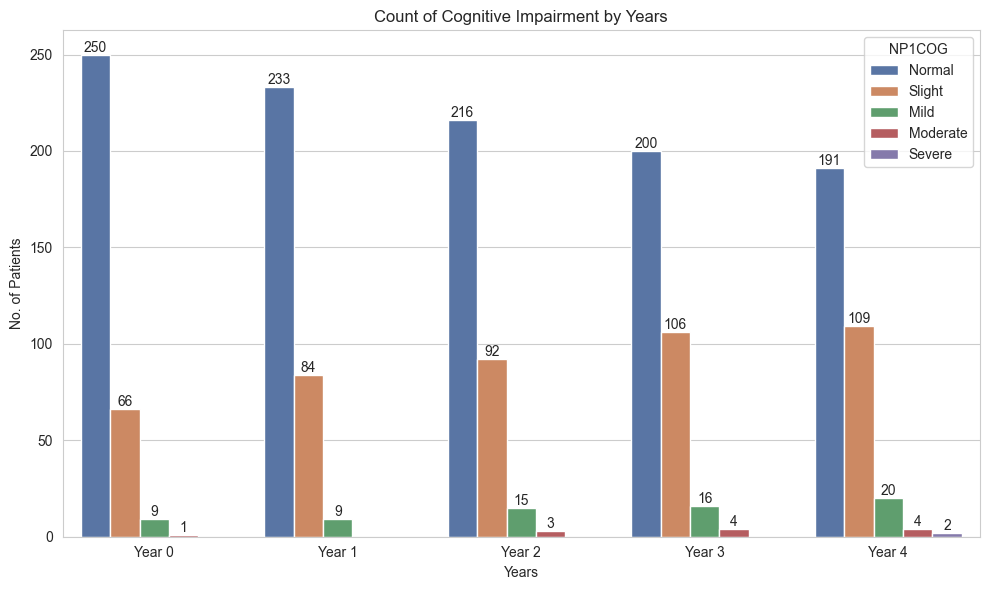

In [421]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='EVENT_ID', hue='NP1COG', data=mds_updrs_part_one_pd, palette='deep')

# Manually add labels to bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.xlabel('Years')
plt.ylabel('No. of Patients')
plt.title('Count of Cognitive Impairment by Years')
plt.legend(title='NP1COG', labels=['Normal', 'Slight', 'Mild', 'Moderate', 'Severe'])

# Modify x-axis tick labels
labels = ['Year 0', 'Year 1', 'Year 2', 'Year 3', 'Year 4']
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

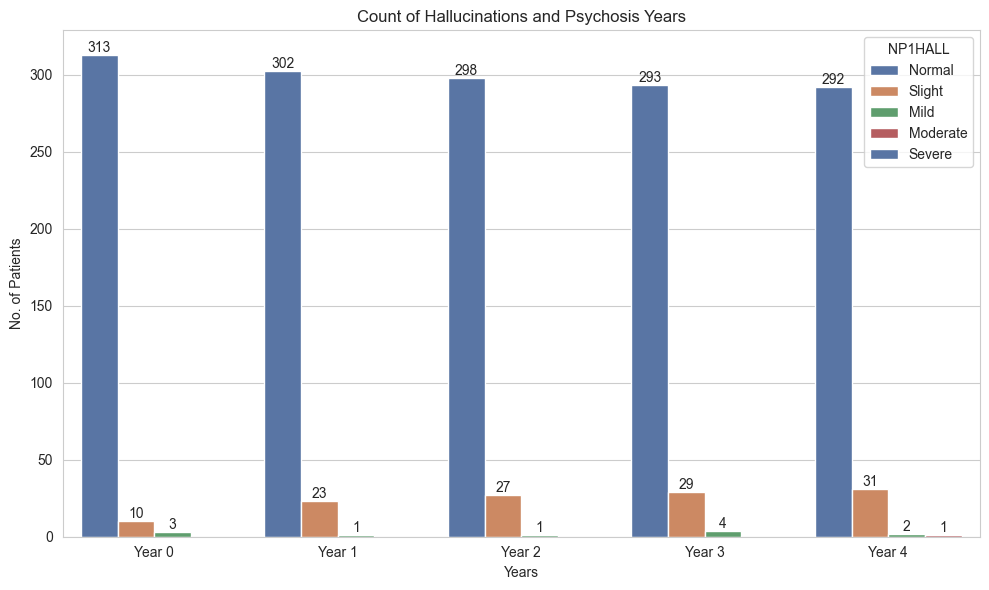

In [422]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='EVENT_ID', hue='NP1HALL', data=mds_updrs_part_one_pd, palette='deep')

# Manually add labels to bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.xlabel('Years')
plt.ylabel('No. of Patients')
plt.title('Count of Hallucinations and Psychosis Years')
plt.legend(title='NP1HALL', labels=['Normal', 'Slight', 'Mild', 'Moderate', 'Severe'])

# Modify x-axis tick labels
labels = ['Year 0', 'Year 1', 'Year 2', 'Year 3', 'Year 4']
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

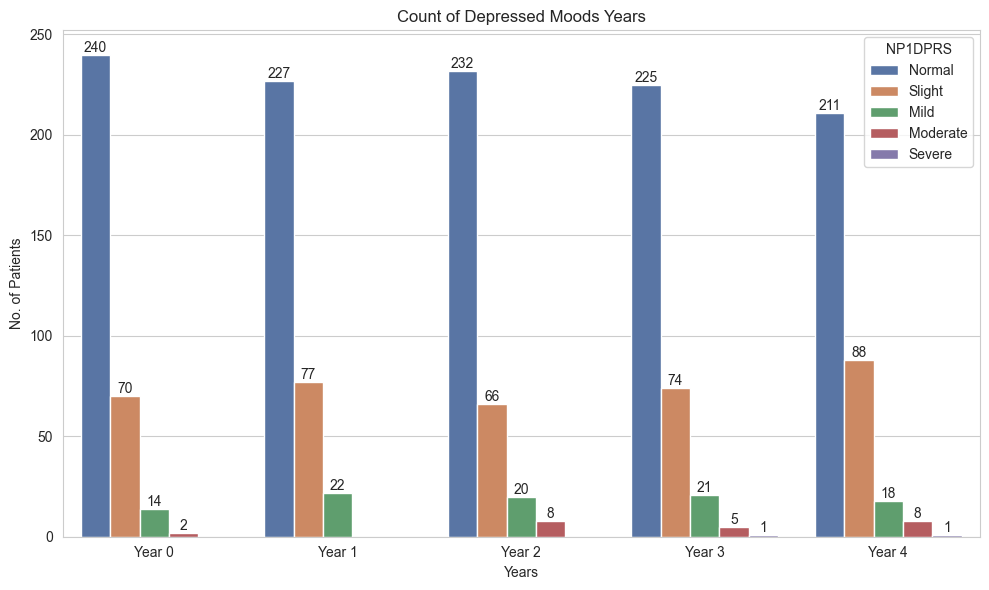

In [423]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='EVENT_ID', hue='NP1DPRS', data=mds_updrs_part_one_pd, palette='deep')

# Manually add labels to bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.xlabel('Years')
plt.ylabel('No. of Patients')
plt.title('Count of Depressed Moods Years')
plt.legend(title='NP1DPRS', labels=['Normal', 'Slight', 'Mild', 'Moderate', 'Severe'])

# Modify x-axis tick labels
labels = ['Year 0', 'Year 1', 'Year 2', 'Year 3', 'Year 4']
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

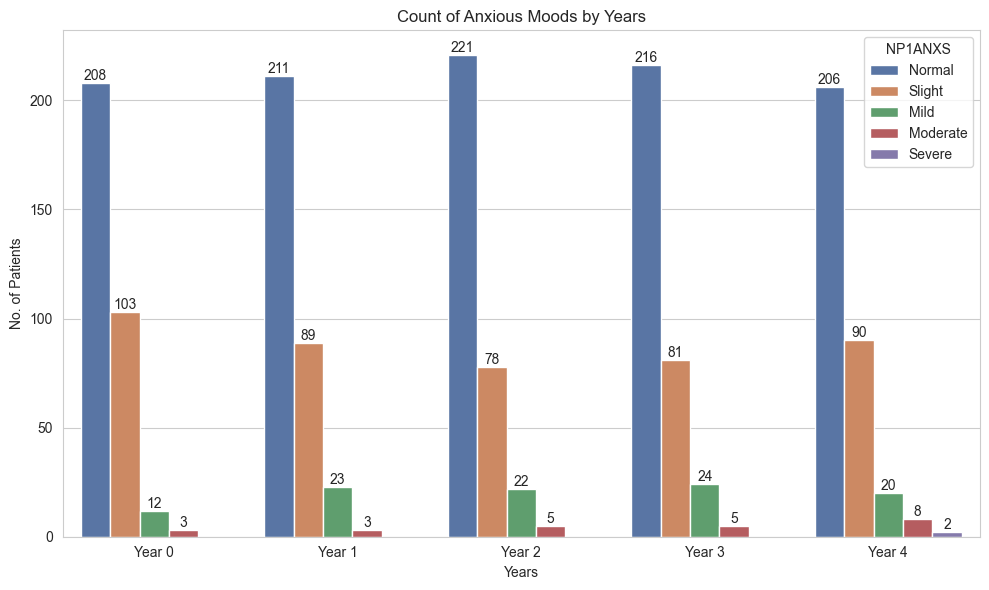

In [424]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='EVENT_ID', hue='NP1ANXS', data=mds_updrs_part_one_pd, palette='deep')

# Manually add labels to bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.xlabel('Years')
plt.ylabel('No. of Patients')
plt.title('Count of Anxious Moods by Years')
plt.legend(title='NP1ANXS', labels=['Normal', 'Slight', 'Mild', 'Moderate', 'Severe'])

# Modify x-axis tick labels
labels = ['Year 0', 'Year 1', 'Year 2', 'Year 3', 'Year 4']
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

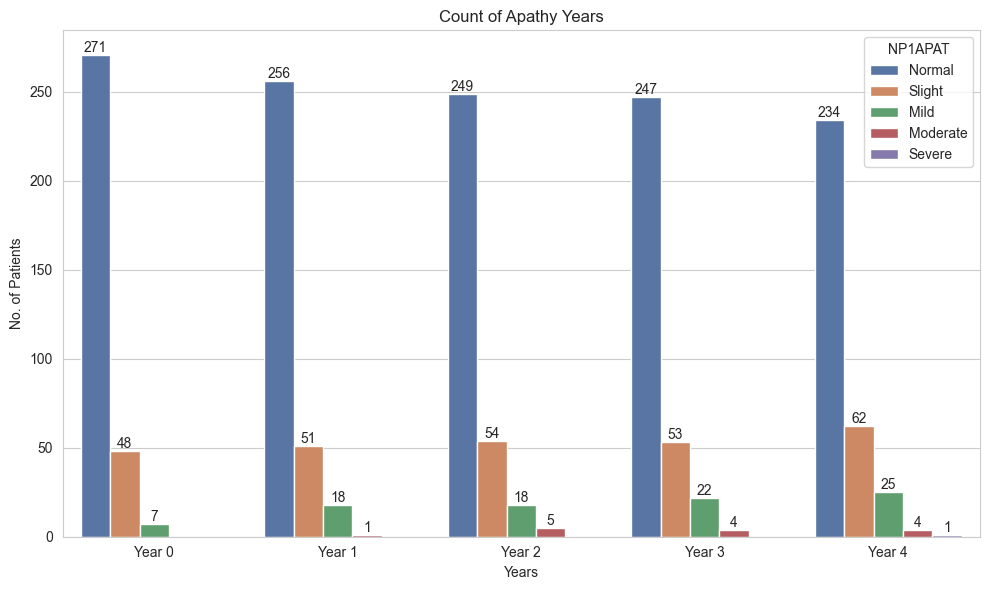

In [425]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='EVENT_ID', hue='NP1APAT', data=mds_updrs_part_one_pd, palette='deep')

# Manually add labels to bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.xlabel('Years')
plt.ylabel('No. of Patients')
plt.title('Count of Apathy Years')
plt.legend(title='NP1APAT', labels=['Normal', 'Slight', 'Mild', 'Moderate', 'Severe'])

# Modify x-axis tick labels
labels = ['Year 0', 'Year 1', 'Year 2', 'Year 3', 'Year 4']
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

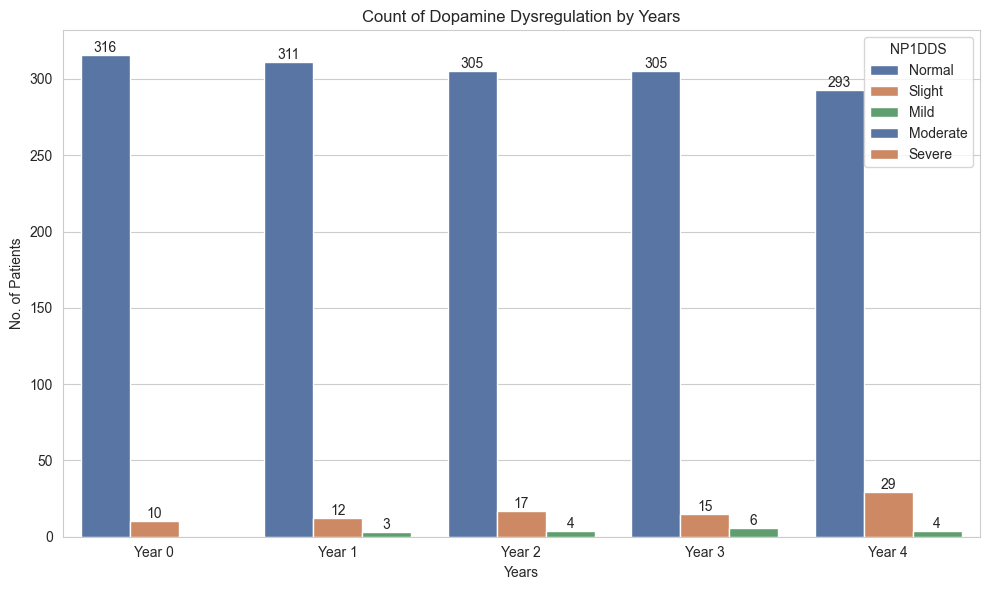

In [426]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='EVENT_ID', hue='NP1DDS', data=mds_updrs_part_one_pd, palette='deep')

# Manually add labels to bars
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.xlabel('Years')
plt.ylabel('No. of Patients')
plt.title('Count of Dopamine Dysregulation by Years')
plt.legend(title='NP1DDS', labels=['Normal', 'Slight', 'Mild', 'Moderate', 'Severe'])

# Modify x-axis tick labels
labels = ['Year 0', 'Year 1', 'Year 2', 'Year 3', 'Year 4']
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

In [369]:
mds_updrs_part_four = pd.read_csv('NecessaryCSVFiles/MDS-UPDRS_Part_IV__Motor_Complications_04Apr2024.csv')

In [370]:
mds_updrs_part_four = mds_updrs_part_four.drop(['REC_ID', 'PAG_NAME', 'INFODT', 'NP4TOT', 'ORIG_ENTRY', 'LAST_UPDATE'], axis=1)

In [371]:
mds_updrs_part_four

,PATNO,EVENT_ID,NP4WDYSK,NP4WDYSKDEN,NP4WDYSKNUM,NP4WDYSKPCT,NP4DYSKI,NP4OFF,NP4OFFDEN,NP4OFFNUM,NP4OFFPCT,NP4FLCTI,NP4FLCTX,NP4DYSTN,NP4DYSTNDEN,NP4DYSTNNUM,NP4DYSTNPCT
0,3001,R17,1,4.0,16.0,25.0,0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,3001,R18,2,4.0,12.0,33.0,1,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,3001,V09,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
3,3001,V10,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
4,3001,V12,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8307,235810,V02,0,0.0,17.0,0.0,0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8308,237943,V02,0,0.0,16.0,0.0,0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8309,238701,V02,0,0.0,18.0,0.0,0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8310,243029,V02,0,0.0,17.0,0.0,0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [372]:
for feature in mds_updrs_part_four.columns:
    print("Feature:", feature)
    print(mds_updrs_part_four[feature].value_counts())
    print("\n")

Feature: PATNO
PATNO
3800      21
3415      20
3819      20
4052      20
4098      19
          ..
123594     1
126812     1
3580       1
128196     1
244043     1
Name: count, Length: 1116, dtype: int64


Feature: EVENT_ID
EVENT_ID
V04    688
V05    643
V06    630
V08    552
V10    539
V07    501
V12    498
V09    460
V02    426
V13    383
V11    380
V14    327
BL     273
V15    226
V16    191
V17    181
V03    157
R17    147
V18    147
R16    138
R15    101
R13     90
R18     88
R12     88
R10     80
R14     67
V19     61
R06     59
R08     49
SC      45
V01     26
R19     25
R01     17
V20      9
PW       7
ST       7
U01      3
R04      3
Name: count, dtype: int64


Feature: NP4WDYSK
NP4WDYSK
0      6315
1      1453
2       340
3       138
4        52
101      14
Name: count, dtype: int64


Feature: NP4WDYSKDEN
NP4WDYSKDEN
 0.0     1662
 1.0      344
 2.0      192
 3.0       95
 4.0       71
 5.0       34
 8.0       30
 6.0       28
 10.0      18
 9.0       17
 12.0      13
 7.0   

In [427]:
# Drop the unrated values 101
mds_updrs_part_four = mds_updrs_part_four[(mds_updrs_part_four['NP4WDYSK'] != 101) & (mds_updrs_part_four['NP4DYSKI'] != 101) & (mds_updrs_part_four['NP4OFF'] != 101) & (mds_updrs_part_four['NP4FLCTI'] != 101) & (mds_updrs_part_four['NP4FLCTX'] != 101) & (mds_updrs_part_four['NP4DYSTN'] != 101)]

In [429]:
mds_updrs_part_four

,PATNO,EVENT_ID,NP4WDYSK,NP4WDYSKDEN,NP4WDYSKNUM,NP4WDYSKPCT,NP4DYSKI,NP4OFF,NP4OFFDEN,NP4OFFNUM,NP4OFFPCT,NP4FLCTI,NP4FLCTX,NP4DYSTN,NP4DYSTNDEN,NP4DYSTNNUM,NP4DYSTNPCT
0,3001,R17,1,4.0,16.0,25.0,0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,3001,R18,2,4.0,12.0,33.0,1,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,3001,V09,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
3,3001,V10,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
4,3001,V12,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8307,235810,V02,0,0.0,17.0,0.0,0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8308,237943,V02,0,0.0,16.0,0.0,0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8309,238701,V02,0,0.0,18.0,0.0,0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8310,243029,V02,0,0.0,17.0,0.0,0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [430]:
# Group by 'PATNO' and filter to keep only those groups where all five event IDs are present
mds_updrs_part_four = mds_updrs_part_four.loc[mds_updrs_part_four['EVENT_ID'].isin(['BL', 'V04', 'V06', 'V08', 'V10'])]

mds_updrs_part_four = mds_updrs_part_four.groupby('PATNO').filter(lambda x: set(['BL', 'V04', 'V06', 'V08', 'V10']).issubset(set(x['EVENT_ID'])))

In [431]:
mds_updrs_part_four

,PATNO,EVENT_ID,NP4WDYSK,NP4WDYSKDEN,NP4WDYSKNUM,NP4WDYSKPCT,NP4DYSKI,NP4OFF,NP4OFFDEN,NP4OFFNUM,NP4OFFPCT,NP4FLCTI,NP4FLCTX,NP4DYSTN,NP4DYSTNDEN,NP4DYSTNNUM,NP4DYSTNPCT
4725,40338,BL,0,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,1.0,1.0,2.0,NaN,NaN,NaN
4729,40338,V04,0,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
4730,40338,V06,0,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
4732,40338,V08,0,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
4734,40338,V10,0,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7576,75562,BL,1,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,1.0,1.0,4.0,NaN,NaN,NaN
7581,75562,V04,1,NaN,NaN,NaN,0,1.0,NaN,NaN,NaN,1.0,1.0,4.0,NaN,NaN,NaN
7582,75562,V06,1,1.0,12.0,8.0,1,1.0,2.0,12.0,17.0,1.0,2.0,2.0,1.0,2.0,50.0
7583,75562,V08,1,1.0,16.0,6.0,0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
